# Lab 2: Formation of wind-fed BH-HMXBs

In this lab, we will analyze the population of wind-fed black hole high mass X-ray binary (BH-HMXB). Through the exercise of reproducing the key figures from this study [Xing et al. (2025)](https://ui.adsabs.harvard.edu/abs/2025A%26A...693A..27X/abstract), you will learn how to select target systems that are non-instantaneous binaries, trace and interpret binary evolution histories, and analyze population properties with weights. 

Introduction on wind-fed BH-HMXBs: 
There are three dynamically confirmed wind-fed BH-HMXBs: Cygnus X-1, LMC X-1, and M33 X-7. Each system consists of a BH accreting mass from a massive main-sequence companion through strong stellar winds. In all three cases, the donor stars are nearly filling their Roche lobes. It has been proposed that BH-HMXBs are only detectable when the transferred stellar wind carries enough angular momentum to form an accretion disk around the black hole. This helps explain a long-standing discrepancy: population synthesis models predict thousands of BH + massive star binaries in our Galaxy, yet only one such system, Cygnus X-1, is observed in the Milky Way. Hirai & Mandel (2021) showed that stellar winds can form an accretion disk if the Roche-lobe filling factor exceeds 0.8–0.9, offering a physical explanation for why all known wind-fed BH-HMXBs have donor stars close to Roche-lobe overfilling.




Make sure you have installed corner with `conda install corner`

In [ ]:
import numpy as np
import corner
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import os
import matplotlib as mpl
from posydon.config import PATH_TO_POSYDON_DATA

mpl.rcParams["text.usetex"] = False
mpl.rcParams["font.family"] = "DejaVu Serif"

# importing path to our lab data
data_path = os.path.join(os.path.dirname(PATH_TO_POSYDON_DATA), "2025_school_data")

cols = ['step_names','time','state','event','S1_state','S2_state','S1_mass','S2_mass','orbital_period','separation','S2_log_R','S2_lg_wind_mdot','S1_spin','eccentricity','rl_relative_overflow_2','rl_relative_overflow_1']

## 1. Individual HMXBs 
From previous labs, we learned how to select target transient binaries. Now, in the case of wind-fed BH-HMXBs, we define the selection criteria as follows:
   - The binary contains a BH and a main-sequence donor star more massive than 10 Msun,
   - The donor star almost fill its Roche lobe, with the filling factor greater than 0.9,
   - The system is not undergoing Roche-lobe overflow (RLOF).
   
Let's take a look at an example that could appear as a wind-fed BH-HMXB during its evolution. 

The population outputs of POSYDON are stored as HDF5 files. These can be read using the Population class in POSYDON, which provides powerful functions for quick data analysis. Alternatively, the files can be read directly with Pandas. In this lab, we will use Pandas to read and analyze the data.

In [ ]:
path = os.path.join(data_path, "populations/HMXB_pops")
df_example = pd.read_hdf(os.path.join(path,'HMXB_example.h5'), key='history')
df_example.loc[0,cols]

,step_names,time,state,event,S1_state,S2_state,S1_mass,S2_mass,orbital_period,separation,S2_log_R,S2_lg_wind_mdot,S1_spin,eccentricity,rl_relative_overflow_2,rl_relative_overflow_1
binary_index,,,,,,,,,,,,,,,,
0,initial_cond,0.000000e+00,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,33.542480,26.840612,7.192992,61.497216,NaN,NaN,NaN,0.000000,NaN,NaN
0,step_HMS_HMS,1.539013e+01,detached,NaN,H-rich_Core_H_burning,H-rich_Core_H_burning,33.504491,26.803594,7.196858,61.499830,0.871081,-7.005543,1.913054,0.000000,-0.664124,-0.661545
0,NaN,6.332220e+06,detached,CC1,stripped_He_Core_C_depleted,H-rich_Core_H_burning,10.160787,27.605482,14.445427,83.722413,1.009771,-6.002985,0.044968,0.000000,-0.738566,-0.948946
0,step_SN,6.332220e+06,detached,NaN,BH,H-rich_Core_H_burning,9.660787,27.605482,11.576499,71.906379,1.009771,-6.002985,0.049258,0.202846,NaN,NaN
0,step_detached,6.332220e+06,detached,Match2,BH,H-rich_Core_H_burning,9.660787,26.199548,11.576499,71.906379,1.086420,-6.002985,0.049258,0.202846,NaN,NaN
0,step_detached,7.702929e+06,RLO2,oRLO2,BH,H-rich_Core_H_burning,9.660787,25.374073,9.019048,59.641867,1.420039,-5.421771,0.049258,0.000000,-0.050000,NaN
0,step_CO_HMS_RLO,7.702929e+06,RLO2,NaN,BH,H-rich_Core_H_burning,10.248659,27.162933,8.730137,59.658120,1.443183,-5.272277,0.049258,0.000000,-0.000007,-1.000000
0,NaN,8.711818e+06,detached,CC2,BH,stripped_He_Core_C_depleted,10.260083,8.578388,5.865611,36.409176,0.058494,-4.961637,0.053186,0.000000,-0.913555,-1.000000
0,step_SN,8.711818e+06,detached,NaN,BH,BH,10.260083,8.078388,6.609822,39.071329,-4.464801,NaN,0.053186,0.127610,NaN,NaN


This binary evolves into a system with a black hole and a main-sequence donor star that eventually fills its Roche lobe. We know that, either before or after RLOF, this system meets the criteria for being a wind-fed BH–HMXB.
However, it is difficult to make a robust selection using only the standard binary output shown above. More importantly, it is not possible to track the binary’s evolution throughout its wind-fed HMXB phases with that output alone.

To study them, we care about the evolutionary history of these binaries. Then, we need to track and output the MESA history data, and/or increasing the number of timesteps in the detached phase. To do this, modify the initialization file before running your population:
 
- In step_CO_HMS_RLO, set `track_interpolation = True` (only valid for interpolation_method = 'nearest_neighbour')
- In step_detached, either:

     add `dt` to specify the timestep size (in years) to be appended  to the history, or
     add `n_o_steps_history` to specify the number of timesteps to be appended. 

After running binaries with these settings, we will get the binary output shown below.

In [ ]:
df_example_track = pd.read_hdf(os.path.join(path,'HMXB_example_track.h5'), key='history')
df_example_track.loc[0,cols]

,step_names,time,state,event,S1_state,S2_state,S1_mass,S2_mass,orbital_period,separation,S2_log_R,S2_lg_wind_mdot,S1_spin,eccentricity,rl_relative_overflow_2,rl_relative_overflow_1
binary_index,,,,,,,,,,,,,,,,
0,step_end,0.000000e+00,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,33.542480,26.840612,7.192992,61.497216,NaN,NaN,NaN,0.000000,NaN,NaN
0,step_HMS_HMS,1.539013e+01,detached,NaN,H-rich_Core_H_burning,H-rich_Core_H_burning,33.504491,26.803594,7.196858,61.499830,0.871081,-7.005543,1.913054,0.000000,-0.664124,-0.661545
0,step_SN,6.332220e+06,detached,CC1,stripped_He_Core_C_depleted,H-rich_Core_H_burning,10.160787,27.605482,14.445427,83.722413,1.009771,-6.002985,0.044968,0.000000,-0.738566,-0.948946
0,NaN,6.332220e+06,detached,NaN,BH,H-rich_Core_H_burning,9.660787,27.605482,11.576499,71.906379,1.009771,-6.002985,0.049258,0.202846,NaN,NaN
0,step_detached,6.332220e+06,detached,Match2,BH,H-rich_Core_H_burning,9.660787,26.199548,11.576499,71.906379,1.086420,-6.002985,0.049258,0.202846,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,8.711748e+06,detached,CC2,BH,stripped_He_Core_He_depleted,10.260083,8.579154,5.865134,36.407693,0.057895,-4.962415,0.053186,0.000000,-0.913672,-1.000000
0,NaN,8.711818e+06,detached,CC2,BH,stripped_He_Core_C_depleted,10.260083,8.578388,5.865611,36.409176,0.058494,-4.961637,0.053186,0.000000,-0.913555,-1.000000
0,step_SN,8.711818e+06,detached,NaN,BH,BH,10.260083,8.078388,6.609822,39.071329,-4.464801,NaN,0.053186,0.127610,NaN,NaN


## Evolutionary path
Let’s plot the evolutionary path of this binary after the primary collapses into a BH and before the secondary undergoes core collapse. We will track the donor star’s mass and radius, along with the orbital period.

In [4]:
M2 = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state']!='BH'),'S2_mass']
R2 = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state']!='BH'),'S2_log_R']
P = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state']!='BH'),'orbital_period']
t = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state']!='BH'),'time']

Text(0, 0.5, '$P_{\\mathrm{orb}}[\\mathrm {d}]$')

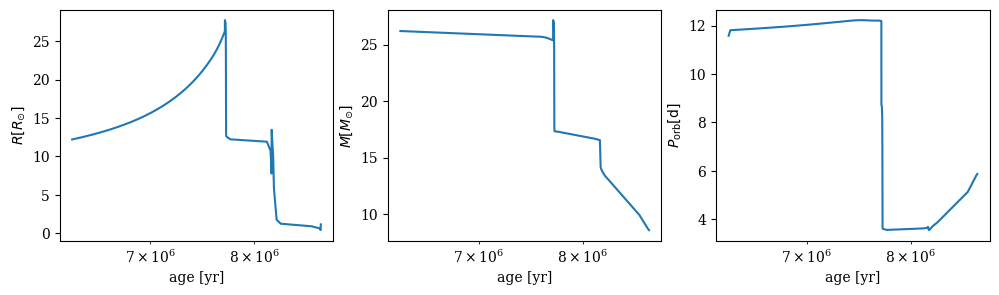

In [5]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
axs[0].plot(t[1:],10**R2[1:])
axs[1].plot(t[1:],M2[1:])
axs[2].plot(t[1:],P[1:])
for ax in axs:
    ax.set_xlabel('age [yr]')
    ax.set_xscale('log')
axs[0].set_ylabel('$R[R_{\odot}]$')
axs[1].set_ylabel('$M[M_{\odot}]$')
axs[2].set_ylabel('$P_{\mathrm{orb}}[\mathrm {d}]$')

<div class='alert alert-success'>
    
## Exercise 1:
Select the interval where the binary appears as a wind-fed BH–HMXB based on the given criteria, as well as the RLOF phase. 

Plot the different phases in different colors.
    
</div>

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Hint (click to reveal):</summary></b>
    
  The selection criteria are: the primary is a BH, the secondary is main-sequence star more massive than 10 Msun, the Roche-lobe filling factor is greater than 0.9, and the system has not yet undergone RLOF. We use the column 'rl_relative_overflow_2' to evaluate Roche-lobe filling. This value is defined as: (r-rl)/rl.

  
</details>

In [21]:
# Write here your code for Excercise 1

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Solution (click to reveal):</summary></b>
  
  
```python
  
M2_hmxb = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='detached')&(df_example_track['rl_relative_overflow_2']>=-0.1),'S2_mass']
R2_hmxb = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='detached')&(df_example_track['rl_relative_overflow_2']>=-0.1),'S2_log_R']
P_hmxb = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='detached')&(df_example_track['rl_relative_overflow_2']>=-0.1),'orbital_period']
t_hmxb = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='detached')&(df_example_track['rl_relative_overflow_2']>=-0.1),'time']

M2_rlo = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='RLO2'),'S2_mass']
R2_rlo = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='RLO2'),'S2_log_R']
P_rlo = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='RLO2'),'orbital_period']
t_rlo = df_example_track.loc[(df_example_track['S1_state']=='BH')&(df_example_track['S2_state'] == 'H-rich_Core_H_burning')&(df_example_track['S2_mass'] >=10)&(df_example_track['state']=='RLO2'),'time']

fig, axs = plt.subplots(1,3, figsize=(12,3))
axs[0].plot(t[1:],10**R2[1:])
axs[0].plot(t_hmxb,10**R2_hmxb,label='Wind-fed')
axs[0].plot(t_rlo,10**R2_rlo,label='RLOF')
axs[1].plot(t[1:],M2[1:])
axs[1].plot(t_hmxb,M2_hmxb)
axs[1].plot(t_rlo,M2_rlo)
axs[2].plot(t[1:],P[1:])
axs[2].plot(t_hmxb,P_hmxb)
axs[2].plot(t_rlo,P_rlo)
for ax in axs:
      ax.set_xlabel('age [yr]')
      ax.set_xscale('log')
axs[0].set_ylabel('$R[R_{\odot}]$')
axs[1].set_ylabel('$M[M_{\odot}]$')
axs[2].set_ylabel('$P_{\mathrm{d}}[\mathrm {d}]$')
axs[0].legend()
  ```
  
</details>

## 2. Population of HMXBs

 Be cautious: appending MESA history and detached-phase history can substantially increase the output data size.
 
 Once we have the H5 file, we can perform an early selection to remove binaries that are not relevant, which helps save space. In this example, we keep only those binaries where the primary forms a BH and undergoes RLOF.

In [23]:
'''
files = ['1e+00_Zsun_population.h5']
# name of your population h5 file
path = '/projects/e33022/POSYDON-shared/populations/Zepei_HMXB/'
# path to the h5 file
'''

"\nfiles = ['1e+00_Zsun_population.h5']\n# name of your population h5 file\npath = '/projects/e33022/POSYDON-shared/populations/Zepei_HMXB/'\n# path to the h5 file\n"

In [8]:
'''
from posydon.popsyn.synthetic_population import Population
for file in files:
    pop = Population(data_path+file)
    tmp_data = pop.history.select(columns=['S1_state', 'event'])
    # Selection of S1 being a BH
    S1_state = tmp_data['S1_state'] == 'BH'
    # Selection of the binary system with star2 being in RLOF
    state = tmp_data['event'] == 'oRLO2'
    indices = tmp_data.index
    del tmp_data
    mask = S1_state & state
    selected_indices = indices[mask].to_list()
    print(f'File: {file}, Number of systems: {len(selected_indices)}')
    pop.export_selection(selected_indices, data_path+'HMXB_all.h5', append=True)
'''

"\nfrom posydon.popsyn.synthetic_population import Population\nfor file in files:\n    pop = Population(data_path+file)\n    tmp_data = pop.history.select(columns=['S1_state', 'event'])\n    # Selection of S1 being a BH\n    S1_state = tmp_data['S1_state'] == 'BH'\n    # Selection of the binary system with star2 being in RLOF\n    state = tmp_data['event'] == 'oRLO2'\n    indices = tmp_data.index\n    del tmp_data\n    mask = S1_state & state\n    selected_indices = indices[mask].to_list()\n    print(f'File: {file}, Number of systems: {len(selected_indices)}')\n    pop.export_selection(selected_indices, data_path+'HMXB_all.h5', append=True)\n"

## Load Populations
 The dataset provided includes detailed binary evolution histories. In this population run, each binary contains 100 timesteps of history in the detchached step, and downsampled MESA history from the CO-HMS_RLO step. This population was run with a CO–HMS grid different from the POSYDON default, using assumptions of super-Eddington accretion. For more detail: [Xing et al. (2025)](https://ui.adsabs.harvard.edu/abs/2025A%26A...693A..27X/abstract).

In [ ]:
df = pd.read_hdf(os.path.join(path,'HMXB_all.h5'), key='history')

## Select Relevant Systems
 In this step, we select all binaries from the population that consist of a BH and a main-sequence companion that is filling its Roche lobe. For simplicity, we exclude systems where the donor star is still on the main sequence when it nearly fills its Roche lobe, but has already evolved off the main sequence by the time RLOF actually begins.

In [25]:
index_bhhms =  df.loc[(df['event'] == 'oRLO2')&(df['S1_state'] == 'BH')&(df['S2_state'] == 'H-rich_Core_H_burning')].index
bhhms=df.loc[index_bhhms]
index_bhhms

Index([     0,     34,    141,    151,    158,    185,    261,    284,    321,
          436,
       ...
       499689, 499728, 499744, 499812, 499853, 499869, 499883, 499956, 499985,
       499987],
      dtype='int64', name='binary_index', length=11187)

## Identify Wind-fed BH-HMXB Phase

 After selecting the relevant binaries, reset their index to prepare for identifying wind-fed phase and calculating the time duration spent in each evolutionary phase.



In [26]:
bhhms_reset = bhhms.reset_index()

<div class='alert alert-success'>
 
## Exercise 2.1:
Let's select all timesteps during which the binary qualifies as a wind-fed BH-HMXB. Find the indexes.
    
</div>

## Solutions:

In [28]:
# Write here your code for Excercise 2.1

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Solution (click to reveal):</summary></b>
    
```python
index = bhhms_reset.loc[(bhhms_reset['S1_state'] == 'BH')&(bhhms_reset['S2_state'] == 'H-rich_Core_H_burning')&(bhhms_reset['S2_mass'] >=10)&(bhhms_reset['state']=='detached')&(bhhms_reset['rl_relative_overflow_2']>=-0.1)].index
bhhms_reset.loc[index,cols]
```
  
</details>


To examine the differences before and after RLOF, separate the wind-fed BH-HMXB phase into two groups: before RLOF, during the detached step, and after RLOF onset, during the MESA step. Let's find the index_beforeRLOF and index_afterRLOF.

Note: there will be a simple way to separate data from different steps in POSYDON in the future more easily using only step_names. For now, when tracking histories, the step names are not consistently appended in step_names for every step. As a workaround, one can distinguish between the detached step and the MESA step by using the `rl_relative_overflow_1` value of the BH.

In [29]:
index_beforeRLOF = bhhms_reset.loc[(bhhms_reset['S1_state'] == 'BH')&
                                   (bhhms_reset['S2_state'] == 'H-rich_Core_H_burning')&
                                   (bhhms_reset['S2_mass'] >=10)&
                                   (bhhms_reset['state']=='detached')&
                                   (bhhms_reset['rl_relative_overflow_2']>=-0.1)&
                                   (bhhms_reset['rl_relative_overflow_1']!=-1)].index
index_afterRLOF = bhhms_reset.loc[(bhhms_reset['S1_state'] == 'BH')&
                                  (bhhms_reset['S2_state'] == 'H-rich_Core_H_burning')&
                                  (bhhms_reset['S2_mass'] >=10)&
                                  (bhhms_reset['state']=='detached')&
                                  (bhhms_reset['rl_relative_overflow_2']>=-0.1)&
                                  (bhhms_reset['rl_relative_overflow_1']==-1)].index
beforeRLOF = bhhms_reset.loc[index_beforeRLOF]
afterRLOF = bhhms_reset.loc[index_afterRLOF]

## Create Cornor Plots

 Now, we visualize the distribution of key binary properties of wind-fed BH-HMXBs using a corner plot. The parameters we include are: the orbital period, BH and donor star mass, and BH spin. 


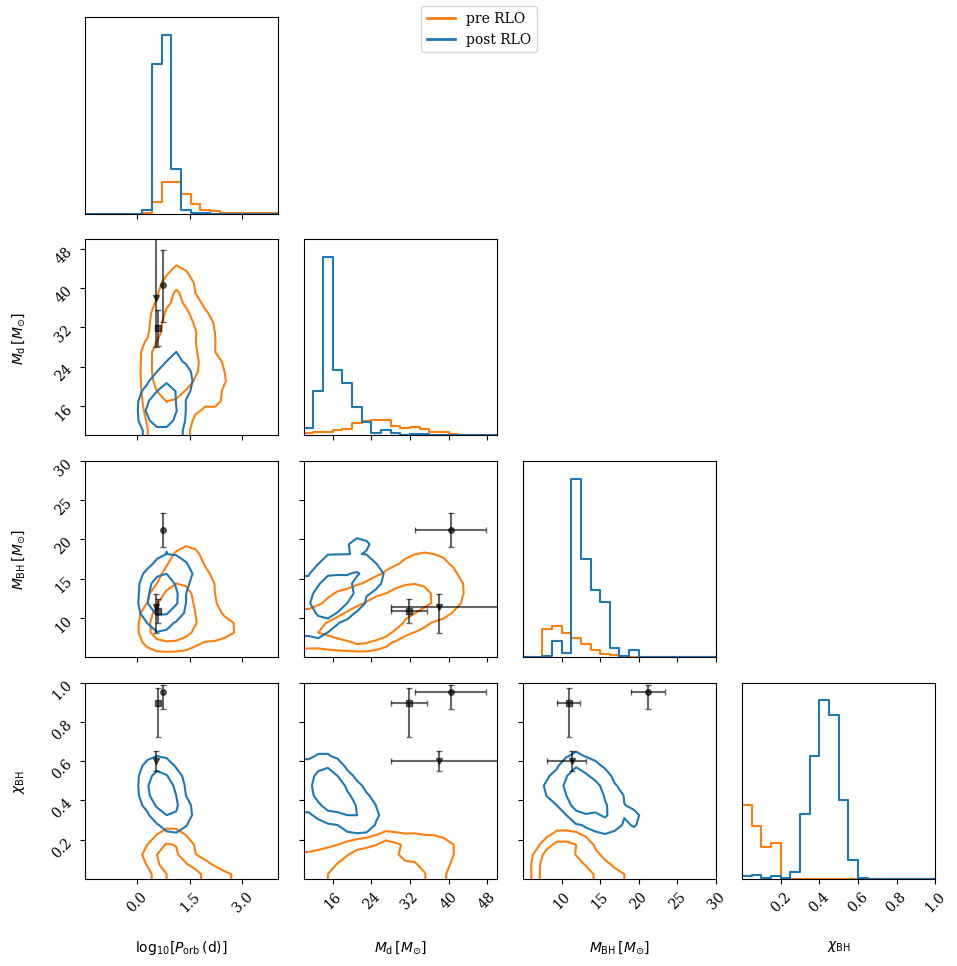

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import corner

# --- build data matrices ---
data_pre = np.column_stack((
    np.log10(beforeRLOF['orbital_period']),
    beforeRLOF['S2_mass'],
    beforeRLOF['S1_mass'],
    beforeRLOF['S1_spin'],
))

data_post = np.column_stack((
    np.log10(afterRLOF['orbital_period']),
    afterRLOF['S2_mass'],
    afterRLOF['S1_mass'],
    afterRLOF['S1_spin'],
))

paramNames = [
    r'$\mathrm{log_{10}}[P_{\mathrm{orb}}\,(\mathrm{d})]$',
    r'$M_{\mathrm{d}}\,[M_{\odot}]$',
    r'$M_{\mathrm{BH}}\,[M_{\odot}]$',
    r'$\chi_{\mathrm{BH}}$'
]

# --- common settings ---
x_range = [(-1.5, 4), (10, 50), (5, 30), (0, 1.0)]

base_kwargs = dict(
    bins=20,                      # more bins → smoother look
    range=x_range,
    levels=(0.68, 0.95),
    smooth=0.75,                  # increase smoothing kernel
    smooth1d=0, 
    plot_datapoints=False,        # hide raw data points
    fill_contours=False,
    plot_density=False,
    labels=paramNames,
)

# --- plot pre-RLOF ---
fig = corner.corner(
    data_pre,
    color='tab:orange',
    **base_kwargs
)

# --- overlay post-RLOF ---
corner.corner(
    data_post,
    color='tab:blue',
    fig=fig,
    **base_kwargs
)

# --- legend ---
handles = [
    plt.Line2D([], [], color='tab:orange', lw=2, label='pre RLO'),
    plt.Line2D([], [], color='tab:blue',   lw=2, label='post RLO'),
]
fig.legend(handles=handles, loc='upper center', frameon=True)


# ====================================================
# Overlay observed systems with asymmetric error bars 
# ====================================================

# systems: Cyg X-1, LMC X-1, M33 X-7
systems = [
    dict(marker='o', P=np.log10(5.599847), Md=40.6, MBH=21.2, spin=0.95,
         Md_err=(7.6, 7.1), MBH_err=(2.2, 2.2), spin_err=(0.084, 0.04)),
    dict(marker='v', P=np.log10(3.453014), Md=38.0, MBH=11.4, spin=0.6,
         Md_err=(10.0, 22.0), MBH_err=(3.3, 1.7), spin_err=(0.05, 0.05)),
    dict(marker='s', P=np.log10(3.91), Md=31.79, MBH=10.91, spin=0.897,
         Md_err=(3.67, 3.67), MBH_err=(1.54, 1.54), spin_err=(0.176, 0.077)),
]

# convenience: convert (low, high) → the numpy arrays errorbar wants
def asy(lo_hi):
    lo, hi = lo_hi
    return [np.array([lo]), np.array([hi])]

# pick the 2D panels you want to annotate
# (kept your indices to avoid relying on internals of corner's axes layout)
axes = fig.get_axes()
targets = {
    # axis_idx: (xkey, ykey, xerr_key, yerr_key)
    4:  ('P',  'Md',  None,      'Md_err'),
    8:  ('P',  'MBH', None,      'MBH_err'),
    9:  ('Md', 'MBH', 'Md_err',  'MBH_err'),
    12: ('P',  'spin', None,     'spin_err'),
    13: ('Md', 'spin', 'Md_err', 'spin_err'),
    14: ('MBH','spin', 'MBH_err','spin_err'),
}

def plot_point(ax, s, xk, yk, xek, yek):
    x = s[xk]; y = s[yk]
    xerr = asy(s[xek]) if xek else None
    yerr = asy(s[yek]) if yek else None
    ax.errorbar(
        x=x, y=y, xerr=xerr, yerr=yerr,
        fmt=s['marker'], markersize=4, capsize=2, alpha=0.6, c='k'
    )

for idx, (xk, yk, xek, yek) in targets.items():
    ax = axes[idx]
    for s in systems:
        plot_point(ax, s, xk, yk, xek, yek)

plt.tight_layout()
plt.show()


However, the distributions we plotted above are not very meaningful, since each binary contains a different number of timesteps during which it appears as a BH–HMXB.

Because systems that persist longer are more likely to be observed, we need to use time-weighted distributions to account for this bias. In other words, each data point should be weighted by the duration the system spends in the wind-fed BH–HMXB phase, in order to better reflect observability.

<div class='alert alert-success'>

## Exercise 2.2:
1. Calculate the time difference of each step for the wind-fed HMXB phase before RLOF. Append it as a new coloum `delta_tb`.
2. Calculate the time difference of each step for the wind-fed HMXB phase after RLOF. Append it as a new coloum `delta_ta`. Because the data is downsampled—and 'rl_relative_overflow_2' is not a key quantity in the downsampling script—the time resolution may be insufficient, especially near the last timestep before the next RLOF phase, where 'rl_relative_overflow_2' can change rapidly. To address this, we can apply a simple linear interpolation to better estimate the duration of the final pre-RLOF step. This provides a more accurate approximation of how long the system remains in the wind-fed BH-HMXB phase after RLOF. Note: the ORIGINAL dataset provides higher resolution than the LITE dataset as it contains the full MESA history.
3. Calculate the ratio of the duration before RLOF to its duration after RLOF.
    
</div>

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Hint (click to reveal):</summary></b>
    
  The duration of each step can be calculated as the time difference from the next step: `df.loc[index+1,'time'].values - df.loc[index,'time'].values`  

  
</details>


In [1]:
# Write here your code for Excercise 2.2

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Solution (click to reveal):</summary></b>
  
  
  ```python
  
delta_tb =bhhms_reset.loc[index_beforeRLOF+1,'time'].values - bhhms_reset.loc[index_beforeRLOF,'time'].values
beforeRLOF['deltat'] = delta_tb

delta_ta = bhhms_reset.loc[index_afterRLOF+1,'time'].values - bhhms_reset.loc[index_afterRLOF,'time'].values
mask = bhhms_reset.loc[index_afterRLOF+1,'rl_relative_overflow_2']< -0.1
delta_ta[mask] = (bhhms_reset.loc[index_afterRLOF[mask]+1,'time'].values - bhhms_reset.loc[index_afterRLOF[mask],'time'].values)*(-0.1-bhhms_reset.loc[index_afterRLOF[mask],'rl_relative_overflow_2'].values)/(bhhms_reset.loc[index_afterRLOF[mask]+1,'rl_relative_overflow_2'].values - bhhms_reset.loc[index_afterRLOF[mask],'rl_relative_overflow_2'].values)
afterRLOF['deltat'] = delta_ta

sum(delta_tb)/(sum(delta_tb)+sum(delta_ta))
  ```
  
</details>


<div class='alert alert-success'>
    
## Exercise 2.3:
Create a corner plot, weighting each data point by its duration.
    
</div>

In [ ]:
# Write here your code for Excercise 2.3

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Solution (click to reveal):</summary></b>
  
  
  ```python
  
import numpy as np
import matplotlib.pyplot as plt
import corner

# --- build data matrices ---
data_pre = np.column_stack((
    np.log10(beforeRLOF['orbital_period']),
    beforeRLOF['S2_mass'],
    beforeRLOF['S1_mass'],
    beforeRLOF['S1_spin'],
))
w_pre = np.array(beforeRLOF['deltat'])

data_post = np.column_stack((
    np.log10(afterRLOF['orbital_period']),
    afterRLOF['S2_mass'],
    afterRLOF['S1_mass'],
    afterRLOF['S1_spin'],
))
w_post = np.array(afterRLOF['deltat'])

paramNames = [
    r'$\mathrm{log_{10}}[P_{\mathrm{orb}}\,(\mathrm{d})]$',
    r'$M_{\mathrm{d}}\,[M_{\odot}]$',
    r'$M_{\mathrm{BH}}\,[M_{\odot}]$',
    r'$\chi_{\mathrm{BH}}$'
]

# --- common settings ---
x_range = [(-1.5, 4), (10, 50), (5, 30), (0, 1.0)]

base_kwargs = dict(
    bins=20,                      # more bins → smoother look
    range=x_range,
    levels=(0.68, 0.95),
    smooth=0.75,                  # increase smoothing kernel
    smooth1d=0, 
    plot_datapoints=False,        # hide raw data points
    fill_contours=False,
    plot_density=False,
    labels=paramNames,
)

# --- plot pre-RLOF ---
fig = corner.corner(
    data_pre,
    weights=w_pre,
    color='tab:orange',
    **base_kwargs
)

# --- overlay post-RLOF ---
corner.corner(
    data_post,
    weights=w_post,
    color='tab:blue',
    fig=fig,
    **base_kwargs
)

# --- legend ---
handles = [
    plt.Line2D([], [], color='tab:orange', lw=2, label='pre RLO'),
    plt.Line2D([], [], color='tab:blue',   lw=2, label='post RLO'),
]
fig.legend(handles=handles, loc='upper center', frameon=True)


# ====================================================
# Overlay observed systems with asymmetric error bars 
# ====================================================

# systems: Cyg X-1, LMC X-1, M33 X-7
systems = [
    dict(marker='o', P=np.log10(5.599847), Md=40.6, MBH=21.2, spin=0.95,
         Md_err=(7.6, 7.1), MBH_err=(2.2, 2.2), spin_err=(0.084, 0.04)),
    dict(marker='v', P=np.log10(3.453014), Md=38.0, MBH=11.4, spin=0.6,
         Md_err=(10.0, 22.0), MBH_err=(3.3, 1.7), spin_err=(0.05, 0.05)),
    dict(marker='s', P=np.log10(3.91), Md=31.79, MBH=10.91, spin=0.897,
         Md_err=(3.67, 3.67), MBH_err=(1.54, 1.54), spin_err=(0.176, 0.077)),
]

# convenience: convert (low, high) → the numpy arrays errorbar wants
def asy(lo_hi):
    lo, hi = lo_hi
    return [np.array([lo]), np.array([hi])]

# pick the 2D panels you want to annotate
# (kept your indices to avoid relying on internals of corner's axes layout)
axes = fig.get_axes()
targets = {
    # axis_idx: (xkey, ykey, xerr_key, yerr_key)
    4:  ('P',  'Md',  None,      'Md_err'),
    8:  ('P',  'MBH', None,      'MBH_err'),
    9:  ('Md', 'MBH', 'Md_err',  'MBH_err'),
    12: ('P',  'spin', None,     'spin_err'),
    13: ('Md', 'spin', 'Md_err', 'spin_err'),
    14: ('MBH','spin', 'MBH_err','spin_err'),
}

def plot_point(ax, s, xk, yk, xek, yek):
    x = s[xk]; y = s[yk]
    xerr = asy(s[xek]) if xek else None
    yerr = asy(s[yek]) if yek else None
    ax.errorbar(
        x=x, y=y, xerr=xerr, yerr=yerr,
        fmt=s['marker'], markersize=4, capsize=2, alpha=0.6, c='k'
    )

for idx, (xk, yk, xek, yek) in targets.items():
    ax = axes[idx]
    for s in systems:
        plot_point(ax, s, xk, yk, xek, yek)

plt.tight_layout()
plt.show()

```
  
</details>


## 3. The initial and the fate of wind-fed BH-HMXBs

We have analyzed the properties of these binaries in their wind-fed BH–HMXB phase. But what about their initial parameter space and their final outcomes?
Let’s now first trace back the properties of these HMXBs at ZAMS.

In [17]:
index_hmxb = beforeRLOF['binary_index'].unique()
hmxb = df.loc[index_hmxb]

In [18]:
hmxb.loc[hmxb['event']=='ZAMS',cols]

,step_names,time,state,event,S1_state,S2_state,S1_mass,S2_mass,orbital_period,separation,S2_log_R,S2_lg_wind_mdot,S1_spin,S2_spin,eccentricity,rl_relative_overflow_2,rl_relative_overflow_1,S2_surface_he4,S2_he_core_mass
binary_index,,,,,,,,,,,,,,,,,,,
0,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,47.402989,30.140678,9.221316,78.891614,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
34,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,29.675505,23.297062,8.182944,64.161845,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
141,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,40.628369,26.582987,9.068648,74.386825,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
151,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,36.359824,14.231021,5.783058,50.132088,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
158,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,59.402805,10.897007,1.591507,23.668849,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499869,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,32.026423,13.157654,8.681327,63.295474,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
499883,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,34.900012,13.156548,9.758853,69.850608,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
499956,initial_cond,0.0,detached,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,34.053619,13.133867,3830.366139,3721.824764,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [19]:
M1 = hmxb.loc[hmxb['event']=='ZAMS','S1_mass']
M2 = hmxb.loc[hmxb['event']=='ZAMS','S2_mass']
P = hmxb.loc[hmxb['event']=='ZAMS','orbital_period']

Text(0, 0.5, '$M_{2}[M_{\\mathrm{\\odot}}]$')

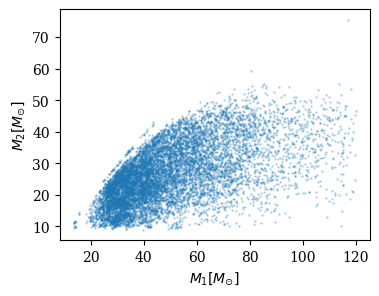

In [20]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(M1,M2,s=0.5,alpha=0.3)
ax.set_xlabel('$M_{1}[M_{\mathrm{\odot}}]$')
ax.set_ylabel('$M_{2}[M_{\mathrm{\odot}}]$')

Text(0, 0.5, '$P_{\\mathrm{orb}}[\\mathrm{d}]$')

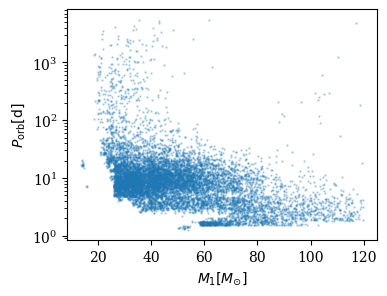

In [21]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(M1,P,s=0.5,alpha=0.3)
ax.set_yscale('log')
ax.set_xlabel('$M_{1}[M_{\mathrm{\odot}}]$')
ax.set_ylabel('$P_{\mathrm{orb}}[\mathrm{d}]$')

<div class='alert alert-success'>

## Exercise 3.1:
Why do all systems go through Case-A mass transfer afterwards, even those that were initially very wide? Next, let’s examine the state of the binary at the moment the BH forms.

Create a plot of BH mass versus donor star mass, and the orbital properties at BH formation.
    
</div>

In [ ]:
# Write here your code for Excercise 3.1

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Solution (click to reveal):</summary></b>
  
  
  ```python

M1_sn = hmxb.loc[(hmxb['step_names']=='step_SN')&(hmxb['S2_state']=='H-rich_Core_H_burning'),'S1_mass']
M2_sn = hmxb.loc[(hmxb['step_names']=='step_SN')&(hmxb['S2_state']=='H-rich_Core_H_burning'),'S2_mass']
P_sn = hmxb.loc[(hmxb['step_names']=='step_SN')&(hmxb['S2_state']=='H-rich_Core_H_burning'),'orbital_period']
e_sn = hmxb.loc[(hmxb['step_names']=='step_SN')&(hmxb['S2_state']=='H-rich_Core_H_burning'),'eccentricity']

fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(M1_sn,M2_sn,s=0.5,alpha=0.3)
ax.set_xlabel('$M_\mathrm{BH}[M_{\mathrm{\odot}}]$')
ax.set_ylabel('$M_\mathrm{2,sn}[M_{\mathrm{\odot}}]$')

fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(e_sn,P_sn,s=0.5,alpha=0.3)
ax.set_yscale('log')
ax.set_xlabel('eccentricity')
ax.set_ylabel('$P_{\mathrm{orb,sn}}[\mathrm{days}]$')

  ```
  
</details>


<div class='alert alert-success'>
    
## Exercise 3.2:
It is interesting to see the fate of these BH-HMXB systems. How do they connect to merging BBH or NSBH systems? Here, we further analyze our HMXB population to see how many eventually evolve into BBHs or NSBHs that will merge within a Hubble time. Find the fraction.
    
</div>

## Solutions:

In [ ]:
# Write here your code for Excercise 3.2

<div class="alert alert-warning" style="margin-top: 20px">
<details>
    
<b><summary>Solution (click to reveal):</summary></b>
  
  
  ```python

index_gw = bhhms.loc[(bhhms['event']=='END')&(bhhms['state']=='contact'),cols].index
len(index_gw)/len(index_bhhms)

  ```
  
</details>
